In [702]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [703]:
train=pd.read_csv(r'C:/Users/sugan/Desktop/t/Train_data.csv')
test = pd.read_csv(r'C:/Users/sugan/Desktop/t/Test_data.csv')

In [704]:
#Renaming the columns
train.rename(columns={'Item_Visibility':'Item_display_area'},inplace=True)
test.rename(columns={'Item_Visibility':'Item_display_area'},inplace=True)

In [705]:
#Concatenate Training and test data
total = pd.concat([train,test])

In [706]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null object
Item_Identifier              14204 non-null object
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null object
Item_Weight                  11765 non-null float64
Item_display_area            14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null object
Outlet_Location_Type         14204 non-null object
Outlet_Size                  10188 non-null object
Outlet_Type                  14204 non-null object
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [707]:
#Changing the required datatypes
for c in total.columns:
    if(total[c].dtype =='O'):
        total[c] = total[c].astype('category')

In [708]:
total['Item_Fat_Content'] = pd.Categorical(total['Item_Fat_Content'],categories=['LF','Reg','reg','Low Fat','Regular','low fat'])
#Correcting inconsistencies with data
total.loc[total['Item_Fat_Content']=='Low Fat','Item_Fat_Content'] ='LF'
total.loc[total['Item_Fat_Content']=='Regular','Item_Fat_Content'] ='Reg'
total.loc[total['Item_Fat_Content']=='reg','Item_Fat_Content'] ='Reg'
total.loc[total['Item_Fat_Content']=='low fat','Item_Fat_Content'] ='LF'
total['Item_Fat_Content'] = pd.Categorical(total['Item_Fat_Content'],categories=['LF','Reg'])

In [709]:
#Imputing data- #Outlet Size
#As per existing data Irrespective of Tier type1 and Grocery store are small.So using small
total.loc[total.Outlet_Size.isnull(),'Outlet_Size'] = 'Small'

In [710]:
#Item_Weight
total['Item_Weight'] = total['Item_Weight'].fillna(total.groupby(['Item_Identifier'])['Item_Weight'].transform('mean'))
total['Item_Weight'] = total['Item_Weight'].fillna(total.groupby(['Item_Fat_Content'])['Item_Weight'].transform('mean'))

In [711]:
total.loc[total['Item_display_area']== 0,'Item_display_area'] = np.nan
total['Item_display_area'] = total['Item_display_area'].fillna(total.groupby(['Item_Identifier','Outlet_Type'])['Item_display_area'].transform('mean'))
total['Item_display_area'] = total['Item_display_area'].fillna(total.groupby(['Item_Identifier'])['Item_display_area'].transform('mean'))


In [712]:
#Creating a Generated type 
def gen_type(x):
    if x[0:2] == 'FD':
        return 'Foods'
    elif x[0:2] == 'DR':
        return 'Drinks'
    else:
        return 'Non Consumable'

In [713]:
#Apply the function on Gen_Item_type
total['Gen_Item_type'] = total['Item_Identifier'].apply(gen_type)

In [714]:
#It doesnt make sense to have fatcontent for non consumables hence make it inedible
total['Item_Fat_Content'] = pd.Categorical(total['Item_Fat_Content'],categories=['LF','Reg','Inedible'])
total.loc[total['Gen_Item_type'] == 'Non Consumable','Item_Fat_Content'] = 'Inedible'

In [715]:
#New column to calculate the age of a outlet
total['Outlet_Age']= 2013 - total['Outlet_Establishment_Year']

In [716]:
train_final = total.iloc[:8523,]
test_final = total.iloc[8523:,]

#test_final.to_csv('Big_mart_test.csv')


In [717]:
test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5681 entries, 0 to 5680
Data columns (total 14 columns):
Item_Fat_Content             5681 non-null category
Item_Identifier              5681 non-null category
Item_MRP                     5681 non-null float64
Item_Outlet_Sales            0 non-null float64
Item_Type                    5681 non-null category
Item_Weight                  5681 non-null float64
Item_display_area            5681 non-null float64
Outlet_Establishment_Year    5681 non-null int64
Outlet_Identifier            5681 non-null category
Outlet_Location_Type         5681 non-null category
Outlet_Size                  5681 non-null category
Outlet_Type                  5681 non-null category
Gen_Item_type                5681 non-null object
Outlet_Age                   5681 non-null int64
dtypes: category(7), float64(4), int64(2), object(1)
memory usage: 453.3+ KB


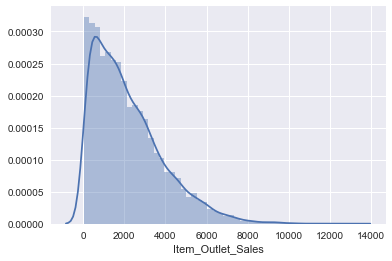

In [718]:
#Distribution of the output
sns.distplot(train_final['Item_Outlet_Sales'])

#Hypothesis to be tested

- outlet_type vs sales (Usually super_market is bigger than grocery so supermarket will have higher volume sales)
- outlet_location_type vs sales (Usually Tier 1 locations tend to have Higer volume of sales)
- outlet size vs sales (Bigger the size of store higher wll be sales)
- Outlet_type, Outlet_location_type vs sales (Supermarkets at cities usually have higher sales)
- Outlet_type, Outlet_size vs sales 
- age of the supermarket vs sales (Usually old supermarket have higher sales because of brand and credibility)
- Display_area vs sales 
- Item_type vs sales (which item has more sales)
- How item_mrp effects the sales??? -- Doesn't make sense.
- Fat type against sales (Are low fat or regular fat products sell more??)
- Previous point with addition of item type
- A distribution of total sales for each outlet- if possible for each category
- Which item has higher sales

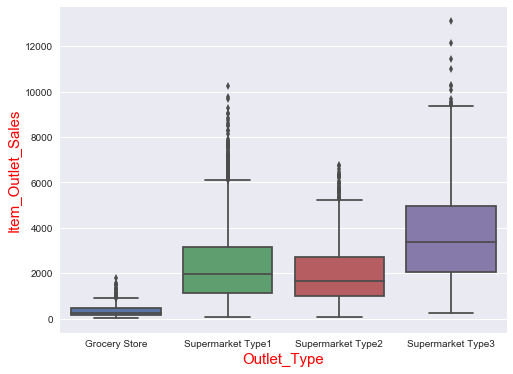

In [719]:
#Outlet type vs Sales -- In general the amount of sales in Super market is high. Supermarket3 has higher sales.
plt.figure(figsize=(8,6))
b = sns.boxplot(train_final['Outlet_Type'],train_final['Item_Outlet_Sales'])
b.set_xlabel(b.get_xlabel(),color='red',fontsize=15)
b.set_ylabel(b.get_ylabel(),color='red',fontsize=15)

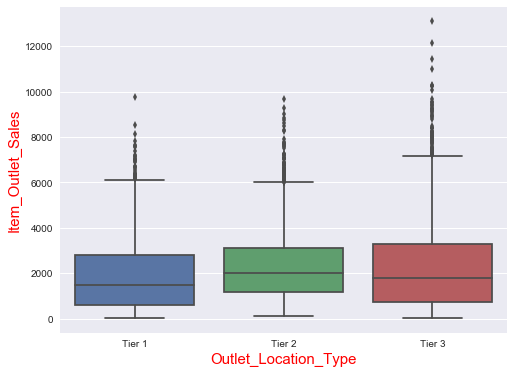

In [720]:
#Outlet Location type vs Sales -- Looks like Tier2 and Tier3 Locations are having higher sales - 
#Is it because number of people in city-Tier 1 are less compared to Tier2 and Tier3 locations??
plt.figure(figsize=(8,6))
b = sns.boxplot(train_final['Outlet_Location_Type'],train_final['Item_Outlet_Sales'])
b.set_xlabel(b.get_xlabel(),color='red',fontsize=15)
b.set_ylabel(b.get_ylabel(),color='red',fontsize=15)

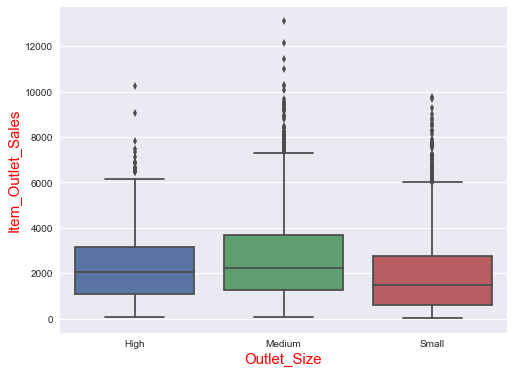

In [721]:
#Outlet Size  vs Sales -- Looks like Medium sized outlets are having higher sales 
plt.figure(figsize=(8,6))
b = sns.boxplot(train_final['Outlet_Size'],train_final['Item_Outlet_Sales'])
b.set_xlabel(b.get_xlabel(),color='red',fontsize=15)
b.set_ylabel(b.get_ylabel(),color='red',fontsize=15)

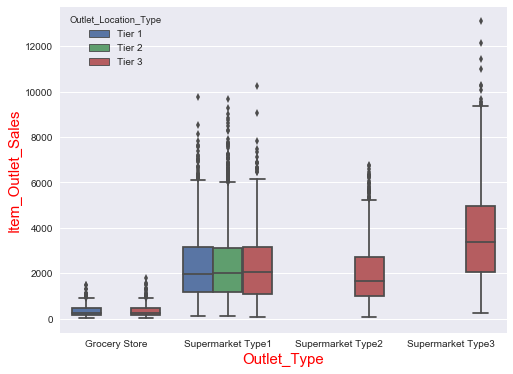

In [722]:
#Not much of a difference in Supermarket sales in Tier1,2,3 Location types.
plt.figure(figsize=(8,6))
b=sns.boxplot(train_final['Outlet_Type'],train_final['Item_Outlet_Sales'],hue=train_final['Outlet_Location_Type'])
b.set_xlabel(b.get_xlabel(),color='red',fontsize=15)
b.set_ylabel(b.get_ylabel(),color='red',fontsize=15)

In [723]:
columns = ['Outlet_Establishment_Year','Item_Outlet_Sales']
temp = train_final[columns]
temp = temp.sort_values(['Outlet_Establishment_Year'],axis=0)
temp_df = temp.groupby(['Outlet_Establishment_Year']).agg(['sum','count'])

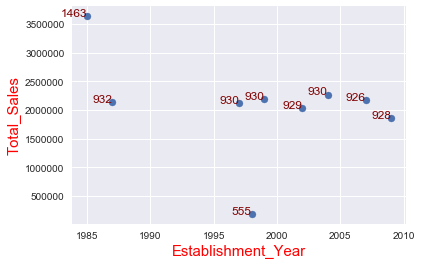

In [724]:
#We can see the sales is proportional to the number of outlets. 
#Hence there is no significant relation to establishment year and sales
plt.scatter(temp_df.index.values,temp_df['Item_Outlet_Sales']['sum'])
for x,y in zip(temp_df.index.values,temp_df['Item_Outlet_Sales']['sum']):
    plt.text(x,y,str(int(temp_df.loc[x,]['Item_Outlet_Sales']['count'])),fontsize=12,horizontalalignment='right',color='maroon')
plt.xlabel('Establishment_Year',fontsize=15,color='red')
plt.ylabel('Total_Sales',fontsize=15,color='red')


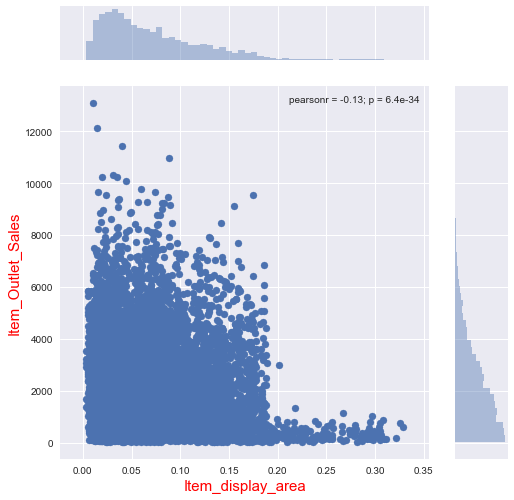

In [725]:
#Conclusion - No relation btw display area and sales of an item
b = sns.jointplot('Item_display_area','Item_Outlet_Sales',data=train_final,size=7,space=0.5)
b.set_axis_labels(xlabel='Item_display_area',ylabel='Item_Outlet_Sales',fontsize=15,color='red')

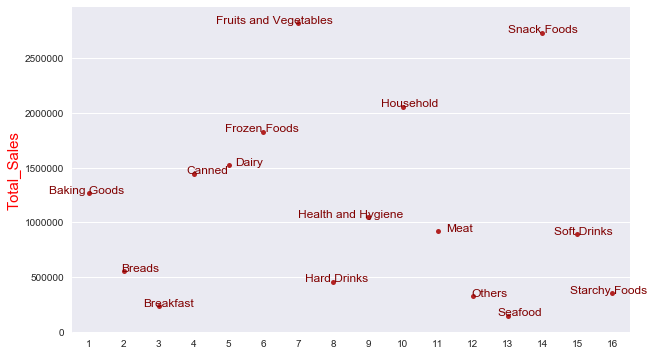

In [726]:
#Interesting to snack leading the highest sale along with Fruits and vegetables
temp1 = train_final.groupby(by='Item_Type').sum()['Item_Outlet_Sales']
plt.figure(figsize=(10,6))
sns.stripplot(np.arange(1,len(temp1.index.values)+1),temp1.values,color='firebrick')
for x,y in zip(np.arange(1,len(temp1.index.values)+1),temp1.values):
    plt.text(x,y,str(temp1.index.values[x-1]),fontsize=12,horizontalalignment='right',color='maroon')
plt.ylabel('Total_Sales',fontsize=15,color='red')

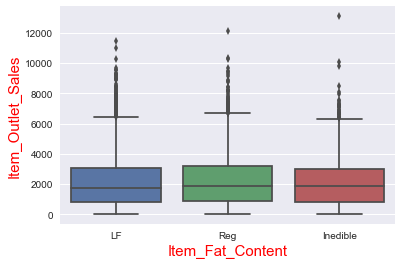

In [727]:
#Fat type against Sales - Average sale is almost same 
b= sns.boxplot(train_final['Item_Fat_Content'],train_final['Item_Outlet_Sales'])
b.set_xlabel(b.get_xlabel(),color='red',fontsize=15)
b.set_ylabel(b.get_ylabel(),color='red',fontsize=15)

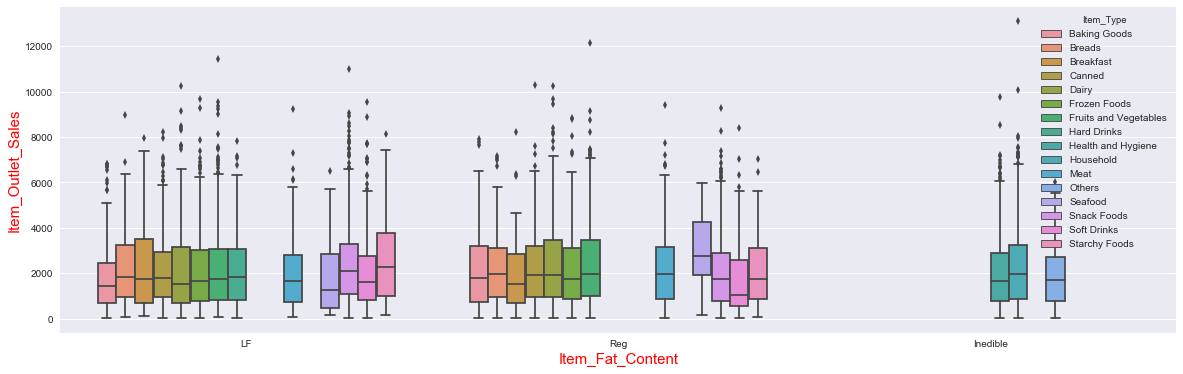

In [728]:
#Previous point with addition of item type - 
#Among LF- Snack and starchy foods has higher avg sales and aong Reg meat has high avg sales
plt.figure(figsize=(20,6))
b=sns.boxplot(train_final['Item_Fat_Content'],train_final['Item_Outlet_Sales'],hue=train_final['Item_Type'])
b.set_xlabel(b.get_xlabel(),color='red',fontsize=15)
b.set_ylabel(b.get_ylabel(),color='red',fontsize=15)


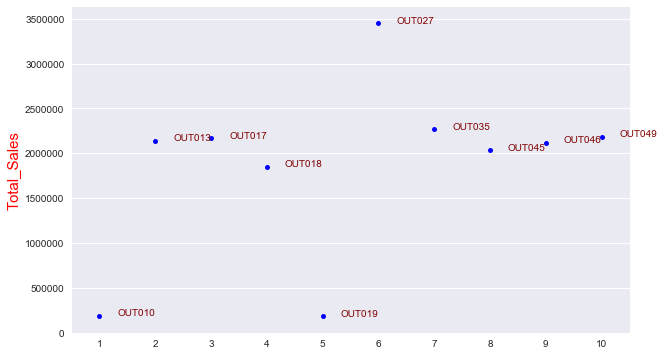

In [729]:
#Out027 stands out in sales - 
#Outlet 010 and 019 has low sales because the number of outlets are low compared to other outlets
temp2 = train_final.groupby(by='Outlet_Identifier').sum()['Item_Outlet_Sales']
plt.figure(figsize=(10,6))
sns.stripplot(np.arange(1,len(temp2.index.values)+1),temp2.values,color='blue')
for x,y in zip(np.arange(1,len(temp2.index.values)+1),temp2.values):
    plt.text(x,y,str(temp2.index.values[x-1]),fontsize=10,horizontalalignment='right',color='maroon')
plt.ylabel('Total_Sales',fontsize=15,color='red')

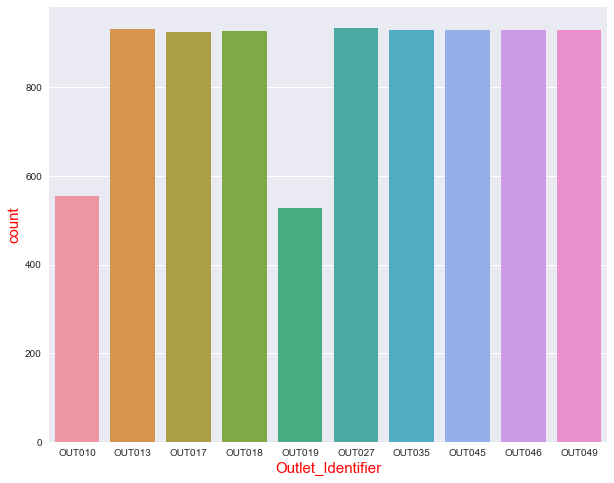

In [730]:
#Count plot of Outlets
plt.figure(figsize=(10,8))
b=sns.countplot(train_final['Outlet_Identifier'])
b.set_xlabel(b.get_xlabel(),fontsize=15,color='red')
b.set_ylabel(b.get_ylabel(),fontsize=15,color='red')

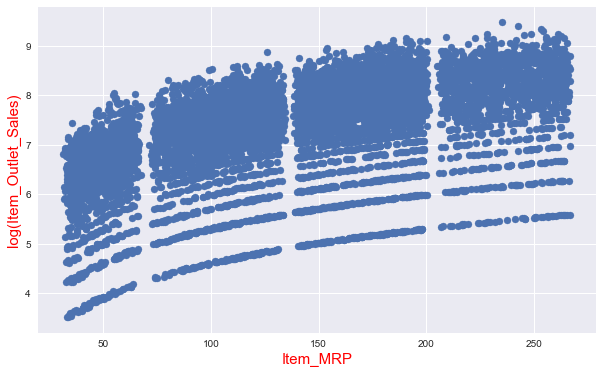

In [731]:
plt.figure(figsize=(10,6))
plt.scatter(train_final['Item_MRP'],np.log(train_final['Item_Outlet_Sales']))
plt.xlabel('Item_MRP',color='red',fontsize=15)
plt.ylabel('log(Item_Outlet_Sales)',color='red',fontsize=15)


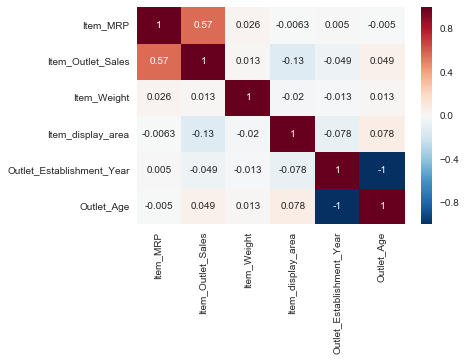

In [732]:
#Checking correlation among numerical variables
sns.heatmap(train_final.corr(),annot=True)

In [733]:
#One hot encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_final['Gen_Item_Fat'] = le.fit_transform(train_final.loc[:,'Item_Fat_Content'])
train_final['Gen_Outlet_Loc_Type'] = le.fit_transform(train_final.loc[:,'Outlet_Location_Type'])
train_final['Gen_Outlet_Size'] = le.fit_transform(train_final.loc[:,'Outlet_Size'])
train_final['Gen_Outlet_Type'] = le.fit_transform(train_final.loc[:,'Outlet_Type'])
train_final['Gen_Item_Type1'] = le.fit_transform(train_final.loc[:,'Gen_Item_type'])
train_final['Gen_Outlet_Ident'] = le.fit_transform(train_final.loc[:,'Outlet_Identifier'])


C:\Users\sugan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\sugan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\sugan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [734]:
train_final

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Weight,Item_display_area,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,Gen_Item_type,Outlet_Age,Gen_Item_Fat,Gen_Outlet_Loc_Type,Gen_Outlet_Size,Gen_Outlet_Type,Gen_Item_Type1,Gen_Outlet_Ident
0,LF,FDA15,249.8092,3735.1380,Dairy,9.300,0.016047,1999,OUT049,Tier 1,Medium,Supermarket Type1,Foods,14,1,0,1,1,1,9
1,Reg,DRC01,48.2692,443.4228,Soft Drinks,5.920,0.019278,2009,OUT018,Tier 3,Medium,Supermarket Type2,Drinks,4,2,2,1,2,0,3
2,LF,FDN15,141.6180,2097.2700,Meat,17.500,0.016760,1999,OUT049,Tier 1,Medium,Supermarket Type1,Foods,14,1,0,1,1,1,9
3,Reg,FDX07,182.0950,732.3800,Fruits and Vegetables,19.200,0.022930,1998,OUT010,Tier 3,Small,Grocery Store,Foods,15,2,2,2,0,1,0
4,Inedible,NCD19,53.8614,994.7052,Household,8.930,0.013203,1987,OUT013,Tier 3,High,Supermarket Type1,Non Consumable,26,0,2,0,1,2,1
5,Reg,FDP36,51.4008,556.6088,Baking Goods,10.395,0.091294,2009,OUT018,Tier 3,Medium,Supermarket Type2,Foods,4,2,2,1,2,1,3
6,Reg,FDO10,57.6588,343.5528,Snack Foods,13.650,0.012741,1987,OUT013,Tier 3,High,Supermarket Type1,Foods,26,2,2,0,1,1,1
7,LF,FDP10,107.7622,4022.7636,Snack Foods,19.000,0.127470,1985,OUT027,Tier 3,Medium,Supermarket Type3,Foods,28,1,2,1,3,1,5
8,Reg,FDH17,96.9726,1076.5986,Frozen Foods,16.200,0.016687,2002,OUT045,Tier 2,Small,Supermarket Type1,Foods,11,2,1,2,1,1,7
9,Reg,FDU28,187.8214,4710.5350,Frozen Foods,19.200,0.094450,2007,OUT017,Tier 2,Small,Supermarket Type1,Foods,6,2,1,2,1,1,2


In [735]:
#Scaling the Numerical features using Minmax
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
train_final['Gen_Item_MRP'] = Scaler.fit_transform(train_final['Item_MRP'])
train_final['Gen_Item_Weight'] = Scaler.fit_transform(train_final['Item_Weight'])
train_final['Gen_Item_dis_area'] = Scaler.fit_transform(train_final['Item_display_area'])
#Encoded Variables
train_final['Gen_Item_Fat'] = Scaler.fit_transform(train_final['Gen_Item_Fat'])
train_final['Gen_Outlet_Loc_Type'] = Scaler.fit_transform(train_final['Gen_Outlet_Loc_Type'])
train_final['Gen_Outlet_Size'] = Scaler.fit_transform(train_final['Gen_Outlet_Size'])
train_final['Gen_Outlet_Type'] = Scaler.fit_transform(train_final['Gen_Outlet_Type'])
train_final['Gen_Item_Type1'] = Scaler.fit_transform(train_final['Gen_Item_Type1'])
train_final['Gen_Outlet_Ident'] = Scaler.fit_transform(train_final['Gen_Outlet_Ident'])

#$$$Scaling Everything
##train_final=Scaler.transform(train_final)



C:\Users\sugan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\sugan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\sugan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

# Linear Regression

In [736]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score,regression

In [737]:
X =train_final[['Item_Identifier','Gen_Item_Fat', 'Gen_Outlet_Loc_Type', 'Gen_Outlet_Size','Gen_Outlet_Type','Gen_Item_Type1',
     'Gen_Outlet_Ident','Gen_Item_MRP','Gen_Item_Weight', 'Gen_Item_dis_area','Outlet_Age']]
y = np.log(train_final['Item_Outlet_Sales'])

In [738]:
columns = ['Gen_Outlet_Loc_Type', 'Gen_Outlet_Size','Gen_Outlet_Type','Gen_Item_Type1',
     'Gen_Outlet_Ident','Gen_Item_MRP', 'Gen_Item_dis_area']
X =train_final[columns]
#y = np.log(train_final['Item_Outlet_Sales'])
y = train_final['Item_Outlet_Sales']

#columns = ['Gen_Item_Weight','Gen_Item_Fat','Gen_Outlet_Type','Gen_Item_MRP', 'Gen_Item_dis_area','Gen_Outlet_Ident']

In [739]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.30, random_state=42)

In [740]:
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [741]:
predictions=lr.predict(X_test)

In [742]:
# print('R-Squared:',metrics.r2_score(np.exp(y_test),np.exp(predictions)))
# print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(predictions)))
# print('MSE:', metrics.mean_squared_error(np.exp(y_test), np.exp(predictions)))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(predictions))))

print('R-Squared:',metrics.r2_score(y_test,predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

R-Squared: 0.509213967311
MAE: 875.631893082
MSE: 1374688.50088
RMSE: 1172.47110876


In [743]:
# import statsmodels.api as sm

# reg_model = sm.OLS(y_train.values, X_train.values)
# model = reg_model.fit()
# pred = model.predict(X_test)

# print(model.summary())

# Ridge Regression

In [744]:
Rg = linear_model.Ridge(alpha=1)
Rg.fit(X_train,y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [745]:
pred2 = Rg.predict(X_test)
Rg.coef_

array([ -213.09568195,  -321.65698247,  2432.90290485,    -9.39507868,
         520.73866773,  3700.69203108,  -595.74719189])

In [746]:
# print('R-Squared:',r2_score(np.exp(y_test),np.exp(pred2)))
# print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(pred2)))
# print('MSE:', metrics.mean_squared_error(np.exp(y_test), np.exp(pred2)))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(pred2))))

print('R-Squared:',metrics.r2_score(y_test,pred2))
print('MAE:', metrics.mean_absolute_error(y_test, pred2))
print('MSE:', metrics.mean_squared_error(y_test, pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred2)))

R-Squared: 0.509251230526
MAE: 875.48913117
MSE: 1374584.12686
RMSE: 1172.42659764


In [747]:
for alpha in [0,1,10,20,50,100,1000]:
    Rid = linear_model.Ridge(alpha=alpha,normalize=True)
    Rmod = Rid.fit(X_train,y_train)
    train_score = Rmod.score(X_train,y_train)
    num_coef = np.sum(abs(Rmod.coef_)>1.0)
    print('alpha:',alpha,'\t','R-sq:',train_score)
    print('number of coeff:',num_coef)

alpha: 0 	 R-sq: 0.500403809395
number of coeff: 7
alpha: 1 	 R-sq: 0.382114208665
number of coeff: 7
alpha: 10 	 R-sq: 0.0935918181829
number of coeff: 7
alpha: 20 	 R-sq: 0.0506076934966
number of coeff: 7
alpha: 50 	 R-sq: 0.0212763738601
number of coeff: 7
alpha: 100 	 R-sq: 0.0108217721676
number of coeff: 7
alpha: 1000 	 R-sq: 0.00109922706929
number of coeff: 3


In [748]:
#Ridge CV - Leave One out CV - ALpha 0 seems to be a better value
alpha1 = [0.0,1.0,10.0,20.0,50.0,100.0,1000.0]
ridgecv=linear_model.RidgeCV(alphas=alpha1)
mod = ridgecv.fit(X_train,y_train)
mod.alpha_

C:\Users\sugan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:922: RuntimeWarning: divide by zero encountered in double_scalars
  w = ((v + alpha) ** -1) - (alpha ** -1)
C:\Users\sugan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:923: RuntimeWarning: divide by zero encountered in double_scalars
  w[constant_column] = - (alpha ** -1)
C:\Users\sugan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:925: RuntimeWarning: divide by zero encountered in double_scalars
  c = np.dot(U, self._diag_dot(w, UT_y)) + (alpha ** -1) * y
C:\Users\sugan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:925: RuntimeWarning: invalid value encountered in add
  c = np.dot(U, self._diag_dot(w, UT_y)) + (alpha ** -1) * y
C:\Users\sugan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:926: RuntimeWarning: divide by zero encountered in double_scalars
  G_diag = self._decomp_diag(w, U) + (alpha ** -1)
C:\Users\sugan\Anaconda3\lib\site-packages\sklearn\linear_model

0.0

# Lasso Regression

In [749]:
Lg = linear_model.Lasso(alpha=1)
Lg = Lg.fit(X_train,y_train)
pred3 = Lg.predict(X_test)

In [750]:
# print('R-Squared:',metrics.r2_score(np.exp(y_test),np.exp(pred3)))
# print('MAE:', metrics.mean_absolute_error(np.exp(y_test), np.exp(pred3)))
# print('MSE:', metrics.mean_squared_error(np.exp(y_test), np.exp(pred3)))
# print('RMSE:', np.sqrt(metrics.mean_squared_error(np.exp(y_test), np.exp(pred3))))

print('R-Squared:',metrics.r2_score(y_test,pred3))
print('MAE:', metrics.mean_absolute_error(y_test, pred3))
print('MSE:', metrics.mean_squared_error(y_test, pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred3)))

R-Squared: 0.509451766901
MAE: 875.076002502
MSE: 1374022.42577
RMSE: 1172.18702679


In [751]:
for alpha in [0,1,10,20,50,100,1000]:
    Lid = linear_model.Lasso(alpha=alpha,normalize=True)
    Lmod = Lid.fit(X_train,y_train)
    train_score = Lmod.score(X_train,y_train)
    num_coef = np.sum(abs(Lmod.coef_)>1.0)
    print('alpha:',alpha,'\t','R-sq:',train_score)
    print('number of coeff:',num_coef)

alpha: 0 	 R-sq: 0.500403809395
number of coeff: 7
alpha: 1 	 R-sq: 0.491114660335
number of coeff: 5
alpha: 10 	 R-sq: 0.119224805435
number of coeff: 1
alpha: 20 	 R-sq: 0.0
number of coeff: 0
alpha: 50 	 R-sq: 0.0
number of coeff: 0
alpha: 100 	 R-sq: 0.0
number of coeff: 0
alpha: 1000 	 R-sq: 0.0
number of coeff: 0


C:\Users\sugan\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sugan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:470: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  positive)
C:\Users\sugan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [752]:
#Ridge CV - Leave One out CV - ALpha 0 seems to be a better value
alpha1 = [0.0,1.0,10.0,20.0,50.0,100.0,1000.0]
lassocv=linear_model.LassoCV(alphas=alpha1)
mod = lassocv.fit(X_train,y_train)
mod.alpha_

C:\Users\sugan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:466: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
C:\Users\sugan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


1.0

# XGradient Boosting

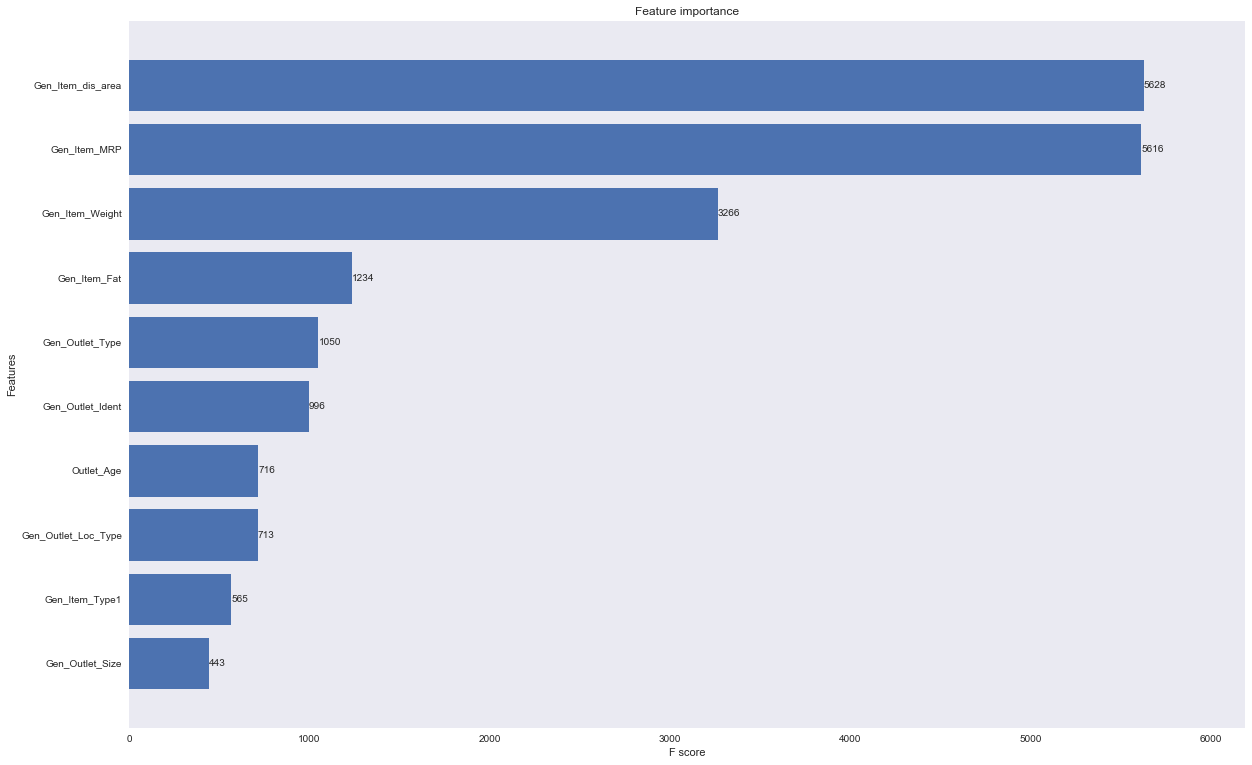

In [753]:
X_xgb = train_final[['Gen_Item_Fat', 'Gen_Outlet_Loc_Type', 'Gen_Outlet_Size','Gen_Outlet_Type','Gen_Item_Type1',
     'Gen_Outlet_Ident','Gen_Item_MRP','Gen_Item_Weight', 'Gen_Item_dis_area','Outlet_Age']]
y_xgb = train_final['Item_Outlet_Sales']
#Analyze Variable Importance using XGB
import xgboost as xgb
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0,
    'lambda':5
}

train = xgb.DMatrix(X_xgb,y_xgb)
boost_model = xgb.train(xgb_params,train,num_boost_round=150)
fig, ax = plt.subplots(1,1,figsize= (20, 13))
xgb.plot_importance(boost_model, grid = False, height= 0.8, ax=ax)

In [754]:
#linear regression using variables which are of high importance
columns = ['Gen_Item_Weight','Gen_Item_Fat','Gen_Outlet_Type','Gen_Item_MRP', 'Gen_Item_dis_area','Gen_Outlet_Ident']
X =train_final[columns]
#y = np.log(train_final['Item_Outlet_Sales'])
y = train_final['Item_Outlet_Sales']

In [755]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.30, random_state=42)
lr = linear_model.LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [756]:
lr.score(X_train,y_train)
print('R-Squared:',metrics.r2_score(y_test,lr.predict(X_test)))
print('MAE:', metrics.mean_absolute_error(y_test, lr.predict(X_test)))
print('MSE:', metrics.mean_squared_error(y_test, lr.predict(X_test)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,lr.predict(X_test))))

R-Squared: 0.50945197549
MAE: 877.189819785
MSE: 1374021.84151
RMSE: 1172.18677757


In [757]:
train_final.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Weight,Item_display_area,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,...,Outlet_Age,Gen_Item_Fat,Gen_Outlet_Loc_Type,Gen_Outlet_Size,Gen_Outlet_Type,Gen_Item_Type1,Gen_Outlet_Ident,Gen_Item_MRP,Gen_Item_Weight,Gen_Item_dis_area
0,LF,FDA15,249.8092,3735.1380,Dairy,9.30,0.016047,1999,OUT049,Tier 1,...,14,0.5,0.0,0.5,0.333333,0.5,1.000000,0.927507,0.282525,0.038399
1,Reg,DRC01,48.2692,443.4228,Soft Drinks,5.92,0.019278,2009,OUT018,Tier 3,...,4,1.0,1.0,0.5,0.666667,0.0,0.333333,0.072068,0.081274,0.048346
2,LF,FDN15,141.6180,2097.2700,Meat,17.50,0.016760,1999,OUT049,Tier 1,...,14,0.5,0.0,0.5,0.333333,0.5,1.000000,0.468288,0.770765,0.040593
3,Reg,FDX07,182.0950,732.3800,Fruits and Vegetables,19.20,0.022930,1998,OUT010,Tier 3,...,15,1.0,1.0,1.0,0.000000,0.5,0.000000,0.640093,0.871986,0.059588
4,Inedible,NCD19,53.8614,994.7052,Household,8.93,0.013203,1987,OUT013,Tier 3,...,26,0.0,1.0,0.0,0.333333,1.0,0.111111,0.095805,0.260494,0.029644


In [819]:
#Do a pd.getdummies 

#col = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Gen_Item_type','Outlet_Identifier']
col = ['Item_Fat_Content','Outlet_Type','Outlet_Identifier']
coded_data = pd.get_dummies(train_final[col])

In [820]:
#col1=['Gen_Item_MRP','Gen_Item_Weight','Gen_Item_dis_area','Outlet_Age']
col1=['Gen_Item_MRP','Gen_Item_Weight','Gen_Item_dis_area']
model_data=train_final[col1]
model_data=pd.concat([model_data,coded_data],axis=1)

In [821]:
from sklearn.tree import DecisionTreeRegressor

X_train,X_test,y_train,y_test=train_test_split(model_data,y,test_size=0.30, random_state=42)

DT = DecisionTreeRegressor(max_depth=5,min_samples_leaf=50,min_samples_split=2)
DT.fit(X_train,y_train)




DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=50, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [822]:
pred4 = DT.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred4)))

RMSE: 1062.77603424


In [823]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(max_depth=5,min_samples_leaf=50,n_estimators=500)
RF.fit(X_train,y_train)
pred5 = RF.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred5)))


RMSE: 1057.03967936


In [824]:
LR = linear_model.LinearRegression()
LR.fit(X_train,y_train)
pred6=LR.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred6)))

RMSE: 1097.71170931


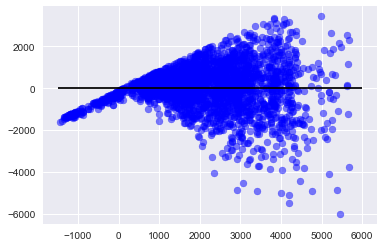

In [839]:
plt.scatter(pred6,(pred6-y_test),c='blue',alpha=0.5)
plt.hlines(y=0,xmin=-1500,xmax=6000)

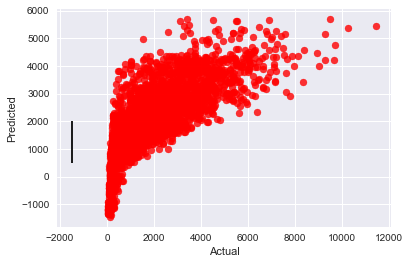

In [843]:
plt.scatter(y_test,pred6,c='red',alpha=0.8)
np.polyfit()
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [825]:
from sklearn.ensemble import GradientBoostingRegressor
GB = GradientBoostingRegressor(learning_rate=0.1, n_estimators=45,  
                          min_samples_leaf=150, max_depth=6)
GB.fit(X_train,y_train)
pred7=GB.predict(X_test)
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,pred7)))

RMSE: 1053.49026639


In [826]:
#Final Testdata
test_final['Gen_Item_MRP'] = Scaler.fit_transform(test_final['Item_MRP'])
test_final['Gen_Item_Weight'] = Scaler.fit_transform(test_final['Item_Weight'])
test_final['Gen_Item_dis_area'] = Scaler.fit_transform(test_final['Item_display_area'])
#col = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Gen_Item_type','Outlet_Identifier']
#col1=['Gen_Item_MRP','Gen_Item_Weight','Gen_Item_dis_area','Outlet_Age']
coded1_data = pd.get_dummies(test_final[col])
test_data=test_final[col1]
test_data=pd.concat([test_data,coded1_data],axis=1)
final_pred = GB.predict(test_data)

C:\Users\sugan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\sugan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
C:\Users\sugan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [827]:
sample = test_final[['Item_Identifier','Outlet_Identifier']]
sample_submissions= pd.concat([sample,pd.DataFrame(final_pred,index=sample.index)],axis=1)

In [828]:
sample_submissions.rename(columns={0:'Item_Outlet_Sales'}, inplace=True)

In [829]:
sample_submissions.to_csv('submissions8.csv')

In [783]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5966 entries, 1921 to 7270
Data columns (total 30 columns):
Gen_Item_MRP                     5966 non-null float64
Gen_Item_Weight                  5966 non-null float64
Gen_Item_dis_area                5966 non-null float64
Outlet_Age                       5966 non-null int64
Item_Fat_Content_LF              5966 non-null uint8
Item_Fat_Content_Reg             5966 non-null uint8
Item_Fat_Content_Inedible        5966 non-null uint8
Outlet_Location_Type_Tier 1      5966 non-null uint8
Outlet_Location_Type_Tier 2      5966 non-null uint8
Outlet_Location_Type_Tier 3      5966 non-null uint8
Outlet_Size_High                 5966 non-null uint8
Outlet_Size_Medium               5966 non-null uint8
Outlet_Size_Small                5966 non-null uint8
Outlet_Type_Grocery Store        5966 non-null uint8
Outlet_Type_Supermarket Type1    5966 non-null uint8
Outlet_Type_Supermarket Type2    5966 non-null uint8
Outlet_Type_Supermarket Type3    596